ALUNO: PEDRO NÍCOLLAS PEREIRA LEON LOPES

### 3 - Construir um outroprojeto de Machine Learning (Regressão):
* Escolher um Dataset com Base qualquer.
* Construir um código com python que implemente o modelo de regressão linear.

In [1]:
'''
DATASET UTILIZADO -> CarPrice_Assignment.csv (/data/CarPrice_Assignment.csv)

Dataset do Kaggle, disponível em: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data?select=CarPrice_Assignment.csv

Projeto realizado utilizando python 3.8.10
'''

'\nDATASET UTILIZADO -> CarPrice_Assignment.csv (/data/CarPrice_Assignment.csv)\n\nDataset do Kaggle, disponível em: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data?select=CarPrice_Assignment.csv\n\nProjeto realizado utilizando python 3.8.10\n'

In [2]:
# Conjunto de importações
import pandas as pd
import numpy as np
import os

In [3]:
dados = pd.read_csv("data/CarPrice_Assignment.csv")         # Leitura do .csv
dados.head()                                                # Visualização do cabeçalho do .csv

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dados.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
dados.info()            # Dados gerais sobre o dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

*PRÉ-PROCESSAMENTO DOS DADOS*

In [6]:
dados = dados.drop('car_ID',axis=1)         # remoção de colunas (inúteis para esta análise)

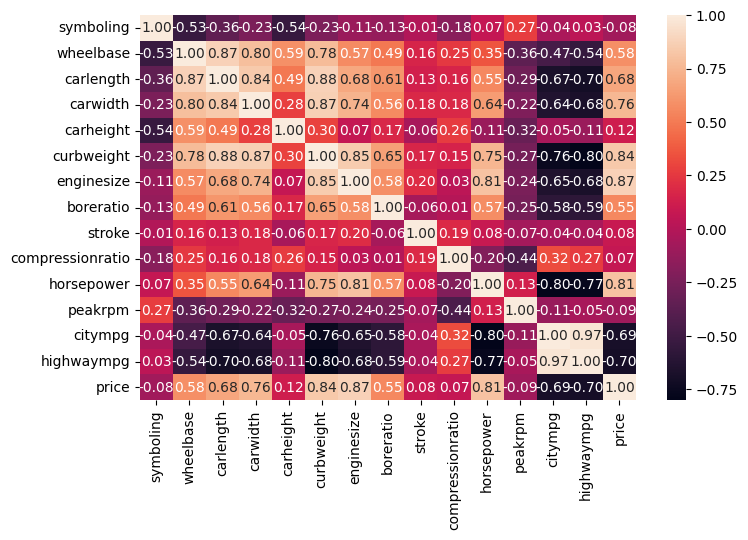

In [7]:
# Criação de uma MATRIZ DE CORRELAÇÃO
import matplotlib.pyplot as plt                         # import do matplotlib para plottagem dos dados
import seaborn as sns                                   # import do seaborn para plottagem dos dados

col_num = dados.select_dtypes(include='number')         # selecionando apenas as colunas numéricas
corr_matrix = col_num.corr()                            # correlação entre as variáveis (apenas numéricas)

plt.figure(figsize=(8, 5))                              
sns.heatmap(corr_matrix, annot=True, fmt='.2f')         # plottagem do heatmap (matriz de correlação)
plt.show()

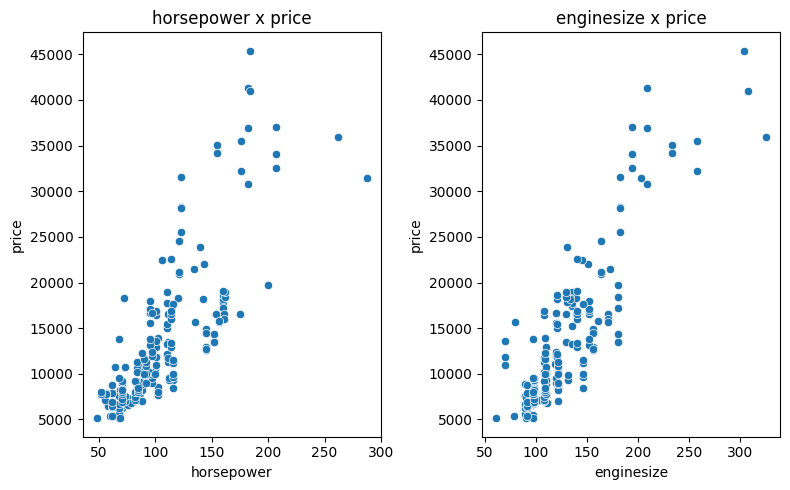

In [8]:
# Plotando colunas que possuem mais correlação          ("horsepower" x  "price" e "enginesize" x "price")
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 5))           # Criando dois subplots lado a lado (1 linha e 2 colunas)

# 1 - "horsepower" x "price"
sns.scatterplot(data=dados, x='horsepower', y='price', ax=axs[0])
axs[0].set_title('horsepower x price')
axs[0].set_xlabel('horsepower')
axs[0].set_ylabel('price')

# 2 - "enginesize" x "price"
sns.scatterplot(data=dados, x='enginesize', y='price', ax=axs[1])
axs[1].set_title('enginesize x price')
axs[1].set_xlabel('enginesize')
axs[1].set_ylabel('price')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler              # import do sklearn para usar MinMaxScaler
normalizador = MinMaxScaler(feature_range=(0,1))            # instância do MinMaxScaler para criação de um normalizador

In [10]:
# NORMALIZAÇÃO DOS DADOS
colunas_para_normalizar = ['horsepower', 'enginesize', 'price']

for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

dados.loc[:,['horsepower', 'enginesize', 'price']].head()         # colunas após normalização (apenas duas colunas foram normalizadas)

,horsepower,enginesize,price
0,0.262500,0.260377,0.207959
1,0.262500,0.260377,0.282558
2,0.441667,0.343396,0.282558
3,0.225000,0.181132,0.219254
4,0.279167,0.283019,0.306142


*Separando a base de dados em amostras de treino e teste*

In [11]:
from sklearn.model_selection import train_test_split            # import do "train_test_split" do sklearn para realizar o treinamento

In [12]:
# Seleção das colunas para treinamento e avaliação
X = dados[['horsepower', 'enginesize']].values          # 2D array
Y = dados['price'].values

In [13]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # separação de 30% para teste e 70% para treino

*Aplicando Modelo Linear Regression*

In [ ]:
from sklearn.linear_model import LinearRegression           # import do LinearRegression()
modelo_LR_car= LinearRegression()                           # import do LinearRegression

In [15]:
modelo_LR_car.fit(X_treino, Y_treino)         # treinamento do modelo

LinearRegression()

In [16]:
Y_previsto = modelo_LR_car.predict(X_teste)            # Realizando previsões na amostra de teste

*RESULTADOS (R²-Score, MAE, MSE e Plottagem de Gráficos)*

In [17]:
# Conjuntos de importações de métricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [18]:
# R²-Score:                                                     -> 80%
print(f"Final test R²: {r2_score(Y_teste, Y_previsto):.2f}")

Final test R²: 0.80


In [ ]:
# MAE:                                                          ->  0.07
mae = mean_absolute_error(Y_teste, Y_previsto)
print(f'MAE: {mae:.2f}')

MAE: 0.07


In [ ]:
# MSE:                                                          -> 0.01
mse = mean_squared_error(Y_teste, modelo_LR_car.predict(X_teste))
print(f'MSE: {mse:.2f}')

MSE: 0.01


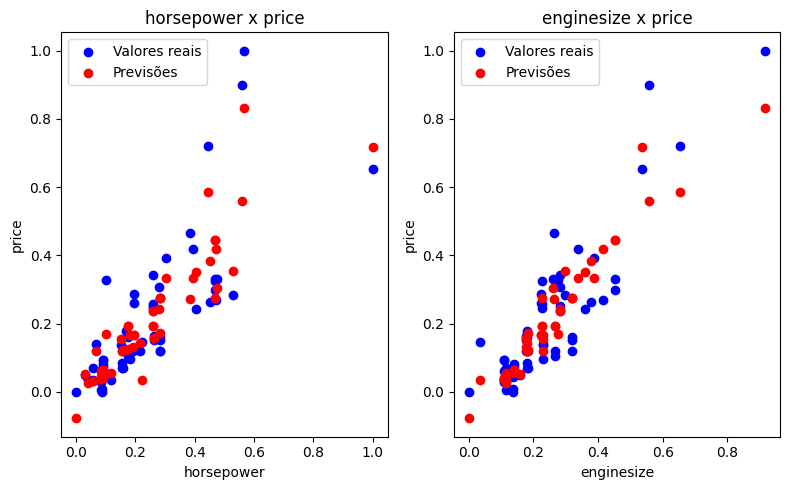

In [21]:
# Também podemos ver os resultado através das plottagens de grafícos, como podemos ver a seguir:
# (Plottagem de dois gráficos -> 1 - "horsepower" x "price" e 2 - "enginesize" x "price")

import matplotlib.pyplot as plt                                                     # uso do matplotilib para plottagem de gráficos

fig, axs = plt.subplots(1, 2, figsize=(8, 5))                                       # subplot com 1 linha e duas colunas (dois gráficos)

# 1 - "horsepower" x "price"
axs[0].scatter(X_teste[:, 0], Y_teste, color='blue', label='Valores reais')         # Representação valores reais (dataset)
axs[0].scatter(X_teste[:, 0], Y_previsto, color='red', label='Previsões')           # Representação previsões (Modelo)
axs[0].set_xlabel('horsepower')
axs[0].set_ylabel('price')
axs[0].set_title('horsepower x price')
axs[0].legend()

# Gráfico 2: enginesize x price
axs[1].scatter(X_teste[:, 1], Y_teste, color='blue', label='Valores reais')         # Representação valores reais (dataset)
axs[1].scatter(X_teste[:, 1], Y_previsto, color='red', label='Previsões')           # Representação previsões (Modelo)
axs[1].set_xlabel('enginesize')
axs[1].set_ylabel('price')
axs[1].set_title('enginesize x price')
axs[1].legend()

plt.tight_layout()
plt.show()

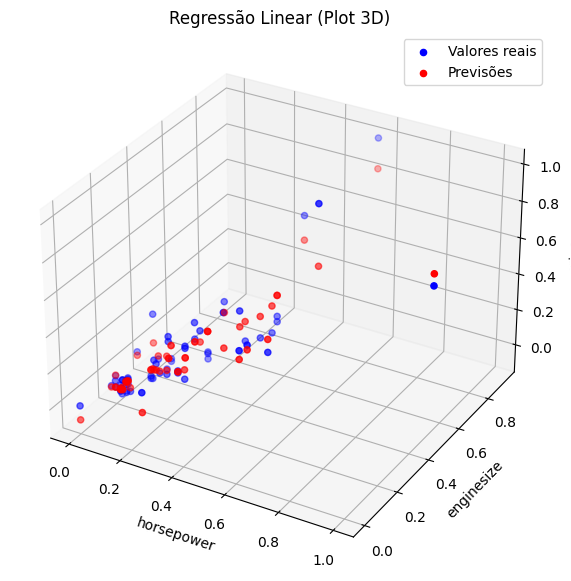

In [22]:
# Também é possível criar uma representação (gráfico) de 3 dimensões, com o matplotlib, como podemos ver a seguir:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Valores reais
ax.scatter(X_teste[:, 0], X_teste[:, 1], Y_teste, color='blue', label='Valores reais')

# Previsões (Modelo)
ax.scatter(X_teste[:, 0], X_teste[:, 1], Y_previsto, color='red', label='Previsões')

ax.set_xlabel('horsepower')
ax.set_ylabel('enginesize')
ax.set_zlabel('price')
ax.set_title('Regressão Linear (Plot 3D)')
ax.legend()
plt.show()
